In [1]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from differentiable_t1d.controls import square_profile, two_compartment_profile, two_equal_compartment_profile, make_sequential_profile

In [3]:
u = make_sequential_profile(two_equal_compartment_profile,
    (jnp.array([1., 1.]), jnp.array([0.1, 0.2])),
    jnp.array([0., 50.]),
)

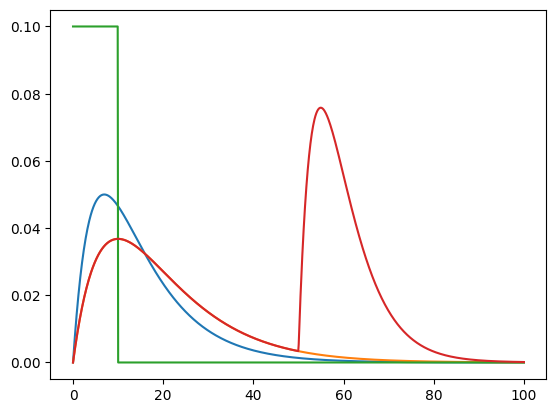

In [4]:
t = jnp.linspace(0, 100, 1000)
fig, ax = plt.subplots()
ra = jax.vmap(two_compartment_profile, (None, None, None, 0))(1, 0.1, 0.2, t)
ax.plot(t, ra)
ra = jax.vmap(two_equal_compartment_profile, (None, None, 0))(1, 0.1, t)
ax.plot(t, ra)
ra = jax.vmap(square_profile, (None, None, 0))(1, 1 / 0.1, t)
ax.plot(t, ra)
ra = jax.vmap(u)(t)
ax.plot(t, ra)